<a href="https://colab.research.google.com/github/ihsanmauri/Telkom-Digital-Talent-Incubator/blob/master/Customer_Clusterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**
Pada dataset ini, diberikan sebuah data kartu keanggotan dari sebuah supermarket mall. Dalam data tersebut terdapat beberapa informasi seperti:  Customer ID, age, gender, annual income dan spending score.

# **Import Data**

In [236]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Raw Dataset**

In [237]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/ihsanmauri/Telkom-Digital-Talent-Incubator/master/Clustering/Mall_Customers.csv', sep = ',')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Data Exploration**

In [238]:
# Prints the Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [239]:
# Prints Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [240]:
# Checking the Rows and Columns
df.shape

(200, 5)

In [241]:
# Find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Gender
['Male' 'Female']


In [242]:
# Find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


Pada dataset ini tidak ditemukan missing value

In [243]:
# Find feature with one-value
for column in df.columns:
    print(column,df[column].nunique())

CustomerID 200
Gender 2
Age 51
Annual Income (k$) 64
Spending Score (1-100) 84


In [244]:
# Categorical Exploration
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['Gender']

In [245]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Gender and number of categories are 2


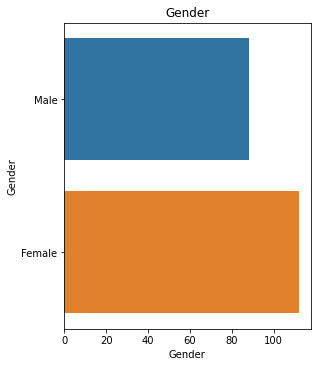

In [246]:
# Check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [247]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables:  4


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [248]:
# Checking discrete
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [249]:
# Checking continuous
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 4


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

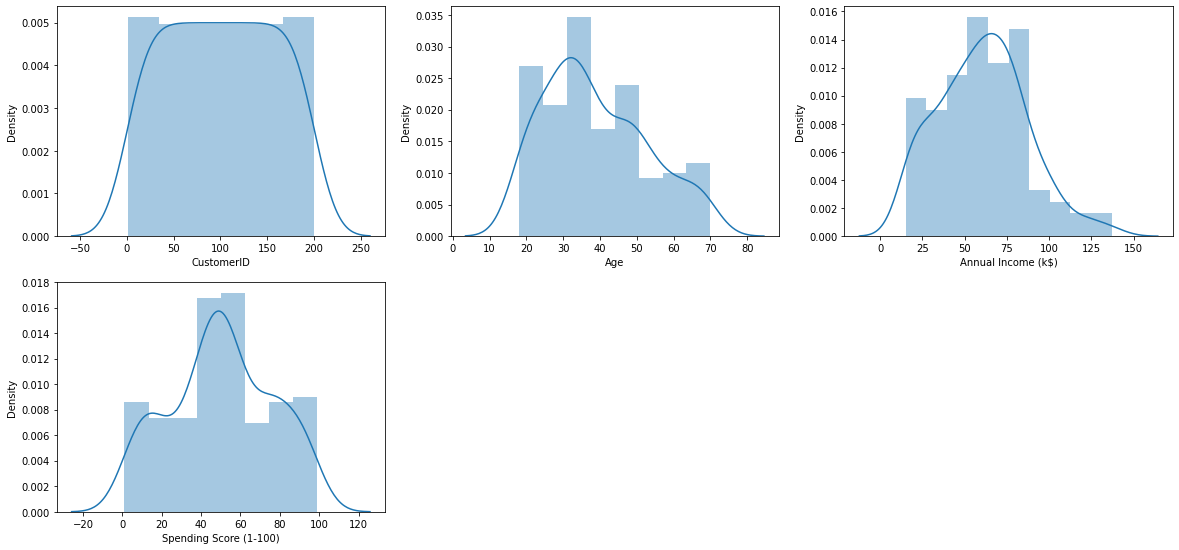

In [250]:
# Plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Terlihat pada grafik diatas, semua data terlihat terdistribusi dengan normal

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

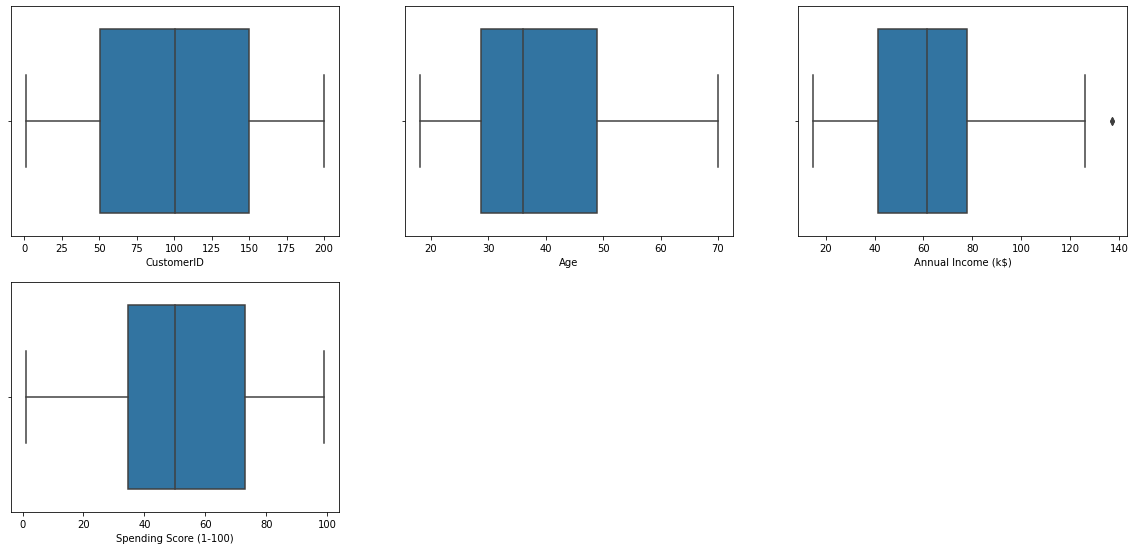

In [251]:
# Boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Terlihat pada annual income terlihat sebuah satu outlier

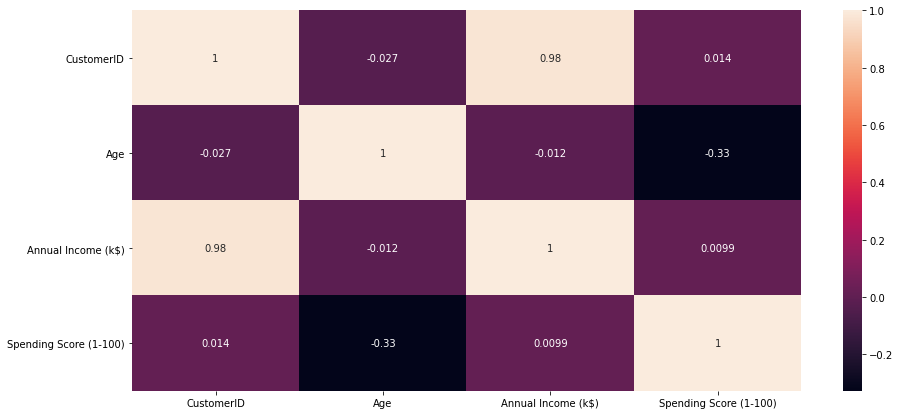

In [252]:
# Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

# **Data Preprocessing**

In [259]:
# Dropping Column
df_drop = df.drop(['CustomerID','Gender','Age'], axis=1)
df_drop

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [260]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_drop.columns.tolist()
df_drop[column_names] = scaler.fit_transform(df_drop[column_names])
df_drop.sort_index(inplace=True)
df_drop

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


Sebelum masuk ke proses pemodelan, variabel perlu di standarisasikan, berfungsi untuk menyetarakan range dan/atau variabilitas data.
Penentuan variabel X diset pada variabel Annual Income dan Spending Score.

# **K-Means**
K-means Clustering adalah salah satu “unsupervised machine learning algorithms” yang paling sederhana dan populer. Tujuan dari algoritma ini adalah untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel K. 
Variabel K sendiri adalah jumlah cluster yang kita inginkan

Untuk memproses data algoritma K-means Clustering , data dimulai dengan kelompok pertama centroid yang dipilih secara acak, yang digunakan sebagai titik awal untuk setiap cluster, dan kemudian melakukan perhitungan berulang (berulang) untuk mengoptimalkan posisi centroid.

Proses ini berhenti atau telah selesai dalam mengoptimalkan cluster ketika:
1. Centroid telah stabil — tidak ada perubahan dalam nilai-nilai mereka karena pengelompokan telah berhasil.
2. Jumlah iterasi yang ditentukan telah tercapai.

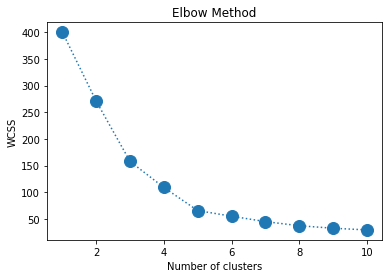

In [261]:
# Transform Data Frame to Numpy Array
income = df_drop.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss,'o:',markersize=12)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [262]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_coeffs = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    sil_coeffs.append(sil_coeff)
    print('Di n_clusters={}, Silhouette Coefficient-nya adalah {}'.format(n_cluster, sil_coeff))

Di n_clusters=2, Silhouette Coefficient-nya adalah 0.359860319067961
Di n_clusters=3, Silhouette Coefficient-nya adalah 0.46658474419000145
Di n_clusters=4, Silhouette Coefficient-nya adalah 0.4939069237513199
Di n_clusters=5, Silhouette Coefficient-nya adalah 0.5546571631111091
Di n_clusters=6, Silhouette Coefficient-nya adalah 0.5377141165734254
Di n_clusters=7, Silhouette Coefficient-nya adalah 0.5317107324040978
Di n_clusters=8, Silhouette Coefficient-nya adalah 0.4550112502601921
Di n_clusters=9, Silhouette Coefficient-nya adalah 0.4591950348855181
Di n_clusters=10, Silhouette Coefficient-nya adalah 0.46004808627183535


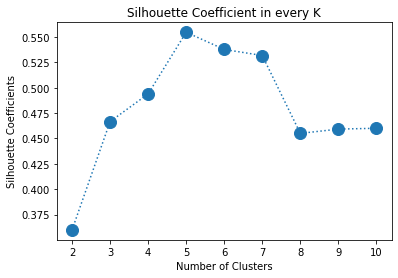

In [263]:
plt.plot(range(2,11),sil_coeffs,'o:',markersize=12)
plt.title("Silhouette Coefficient in every K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

Berdasarkan hasil perhitungan Elbow dan Silhouette, maka K yang akan digunakan sebagai cluster berjumlah 5

# **Modelling K-Means**

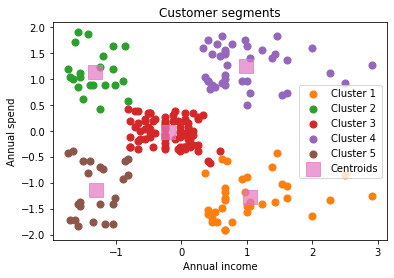

In [264]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=5
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_drop)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[cluster == 3, 0], income[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income[cluster == 4, 0], income[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [265]:
# Add Cluster Information to the Raw Data
df['cluster'] = cluster
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


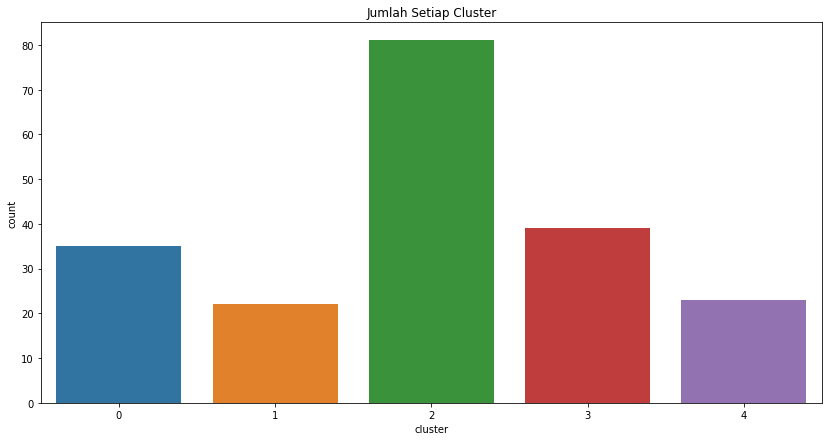

In [266]:
plt.figure(figsize=(14, 7))
plt.title('Jumlah Setiap Cluster')
sns.countplot(x = df['cluster'])
plt.show()

# **Kesimpulan**
Maka dari data diatas ini, dapat disimpulkan bahwa pengelompokkan data terbagi menjadi 5 cluster. Dengan cluster 2 menempati posisi terbanyak